In [1]:
from tensor_fusion.net import ARF, TFN
import torch


input_sizes = (300, 5, 20)
hidden_sizes = (128, 32, 32)
fusion_size = 128
out_size = 1
dropouts = (0, 0, 0, 0, 0)
device = 'cuda'
dtype = torch.float32

full_model = TFN(input_sizes, hidden_sizes, fusion_size, out_size, dropouts, device=device, dtype=dtype)
compressed_model = ARF(input_sizes, hidden_sizes, fusion_size, 200, out_size, dropouts, device=device, dtype=dtype)

/home/christian_lee/anaconda3/envs/tensor_fusion/lib/python3.8/site-packages/tltorch/factorized_tensors/core.py:145: UserWarning: Creating a subclass of FactorizedTensor TensorizedTensor with no name.
  warnings.warn(f'Creating a subclass of FactorizedTensor {cls.__name__} with no name.')


In [2]:
from tensor_fusion.dataset import get_cmu_mosi_dataset

train_set, valid_set, test_set = get_cmu_mosi_dataset(binary=True, device=device, dtype=dtype)
#train_set = torch.utils.data.Subset(train_set, list(range(1000)))

In [3]:
from tensor_fusion.train import binary_map_train_ARF, binary_map_train_TFN

coeff = 1e-1
lr = 1e-2
full_max_accuracy, full_max_model, full_result = binary_map_train_TFN(full_model, train_set, test_set, learning_rate=5e-4, print_result=True)
comp_max_accuracy, comp_max_model, comp_result = binary_map_train_ARF(compressed_model, train_set, test_set, coeff, lr, print_result=True)
comp_max_model.compress()

Epoch 0
Train Loss 0.6885
Valid Loss 0.6721
Test Bin Acc 0.6589
Epoch 1
Train Loss 0.5974
Valid Loss 0.5672
Test Bin Acc 0.7201
Epoch 2
Train Loss 0.4973
Valid Loss 0.5610
Test Bin Acc 0.7128
Epoch 3
Train Loss 0.4258
Valid Loss 0.5490
Test Bin Acc 0.7405
Epoch 4
Train Loss 0.3739
Valid Loss 0.5605
Test Bin Acc 0.7347
Epoch 5
Train Loss 0.3096
Valid Loss 0.6972
Test Bin Acc 0.6939
Epoch     7: reducing learning rate of group 0 to 5.0000e-05.
Epoch 6
Train Loss 0.2358
Valid Loss 0.8050
Test Bin Acc 0.6589
Epoch 7
Train Loss 0.1632
Valid Loss 0.7715
Test Bin Acc 0.7157
Epoch 8
Train Loss 0.1558
Valid Loss 0.8060
Test Bin Acc 0.7230
Epoch    10: reducing learning rate of group 0 to 5.0000e-06.
Epoch 9
Train Loss 0.1317
Valid Loss 0.8279
Test Bin Acc 0.7201
Epoch 10
Train Loss 0.1222
Valid Loss 0.8318
Test Bin Acc 0.7216
Epoch 11
Train Loss 0.1185
Valid Loss 0.8383
Test Bin Acc 0.7157
Epoch    13: reducing learning rate of group 0 to 5.0000e-07.
Epoch 12
Train Loss 0.1179
Valid Loss 0.8447

In [9]:
print('Full Model : Acc. {:.4f}     Total Params. {:10}     Fusion Params. {:10}'.format(
    full_max_accuracy, full_max_model.count_parameters(), full_max_model.count_fusion_parameters()))

print('Comp. Model: Acc. {:.4f}     Total Params. {:10}     Fusion Params. {:10}'.format(
    comp_max_accuracy, comp_max_model.count_parameters(), comp_max_model.count_fusion_parameters()))

print('Total Comp. Ratio {:5}   Fusion Comp. Ratio {:5}'.format(
    full_max_model.count_parameters() / comp_max_model.count_parameters(), 
    full_max_model.count_fusion_parameters() / comp_max_model.count_fusion_parameters()))

Full Model : Acc. 0.7405     Total Params.   18256609     Fusion Params.   17981696
Comp. Model: Acc. 0.7609     Total Params.     325261     Fusion Params.      50348
Total Comp. Ratio 56.12910554908212   Fusion Comp. Ratio 357.1481687455311


In [11]:
import matplotlib.pyplot as plt
result = comp_result

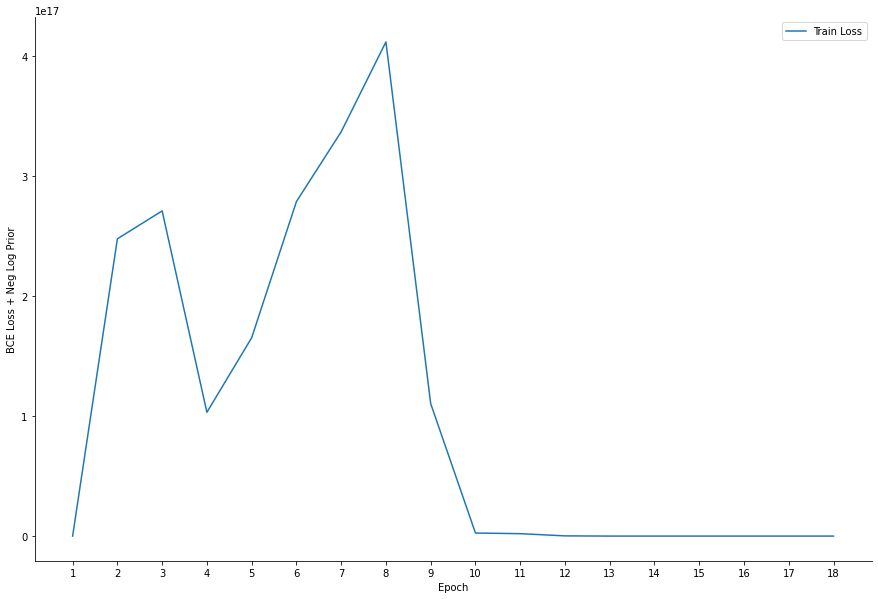

In [12]:
fig, ax = plt.subplots(figsize=(15,10))
x = list(range(1,len(result['train_loss'])))
ax.plot(x, result['train_loss'][1:], label='Train Loss')
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.set_xticks(x)
ax.set_xlabel('Epoch')
ax.set_ylabel('BCE Loss + Neg Log Prior')
ax.legend()
#plt.savefig('train_train_loss.jpg')
plt.show()

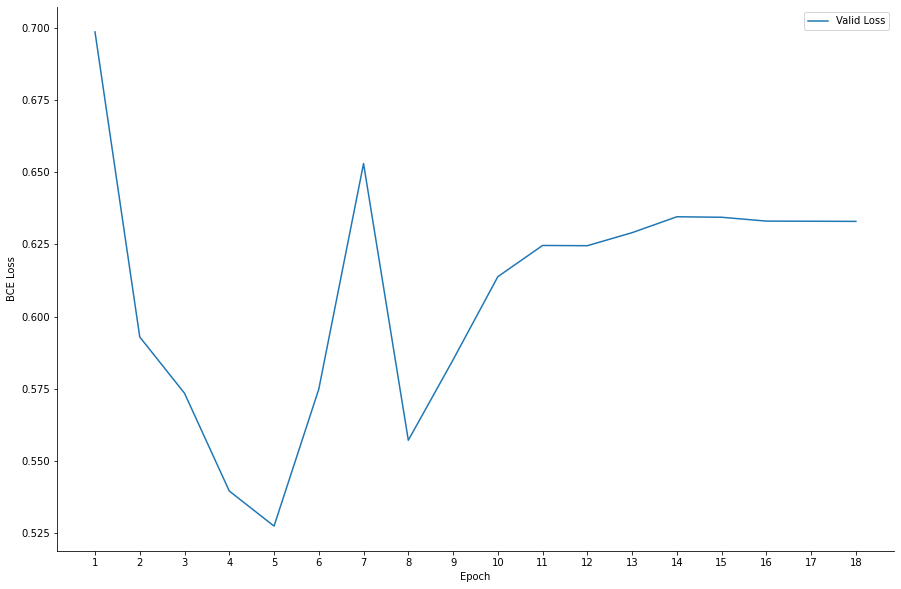

In [13]:
fig, ax = plt.subplots(figsize=(15,10))
ax.plot(x, result['valid_loss'][1:], label='Valid Loss')
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.set_xticks(x)
ax.set_xlabel('Epoch')
ax.set_ylabel('BCE Loss')
ax.legend()
#plt.savefig('train_valid_loss.jpg')
plt.show()

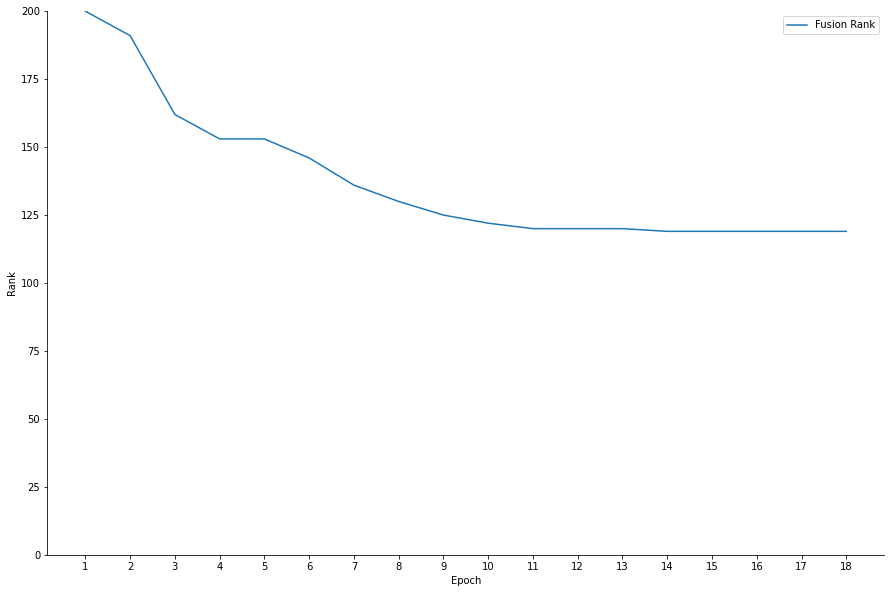

In [14]:
fig, ax = plt.subplots(figsize=(15,10))
ax.plot(x, result['rank'], label='Fusion Rank')
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
#ax.annotate(str(result['rank'][2]), xy=(3, result['rank'][2]), xytext=(3.5, result['rank'][2]))
#ax.annotate(str(result['rank'][3]), xy=(4, result['rank'][3]), xytext=(4.5, result['rank'][3]))
#ax.annotate(str(result['rank'][4]), xy=(5, result['rank'][4]), xytext=(5.5, result['rank'][4]))
ax.set_xticks(x)
ax.set_xlabel('Epoch')
ax.set_ylabel('Rank')
ax.legend()
ax.set_ylim(0, 200)
#plt.savefig('train_rank.jpg')
plt.show()